# Root Finding

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### Pre Exercise

Let us consider the function $x=\cos(x)$

1) Plot something useful that helps you find the answer. You may find plt.xlim, plt.ylim, plt.grid useful. See documentation.

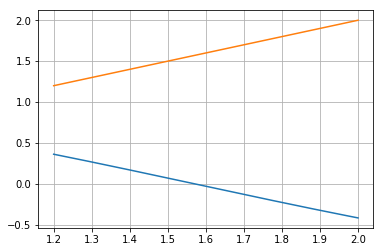

In [83]:
xs = np.linspace(1.2,2,1000)
fx = [math.cos(x) for x in xs]
gx = xs
plt.plot(xs,fx)
plt.plot(xs,gx)
plt.grid()
# plt.xlim(0.725,0.750)
# plt.ylim(0.725,0.750)

2)What is your answer?

2.1) Now Turn this problem in to the form of $f(x) = 0$. What is your $f(x)$? Now plot that and plot the line $y=0$ as well. You may find `axhline` useful

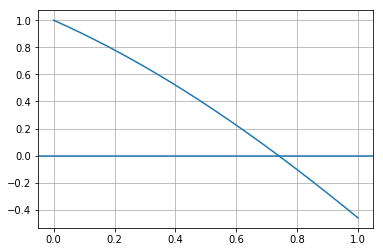

In [12]:
plt.plot(xs,np.cos(xs)-xs)
plt.axhline(0)
plt.grid()

3) If you use a bisection method and your starting bound is $x=0.2$ and $x=1.2$, how do you know that there is a solution in between without looking at the graph?

${\bf \text{The sign is different}}$

3.1) Plot the graph along with the two vertical line representing the bound. (use plt.axvline)

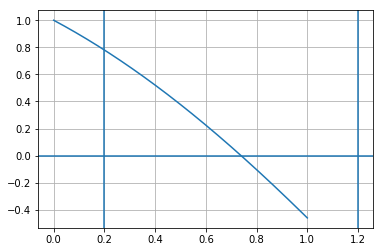

In [18]:
plt.axvline(0.2)
plt.axvline(1.2)
plt.axhline(0)
plt.plot(xs,np.cos(xs)-xs)
plt.grid()

4) What is your guess for the initial bound? Plot it along with the bound.

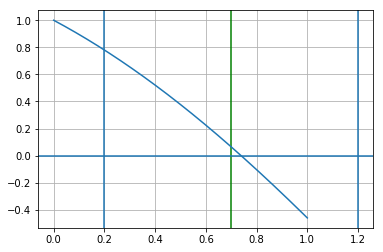

In [28]:
plt.axvline(0.2)
plt.axvline(0.7,color = "green")
plt.axvline(1.2)
plt.axhline(0)
plt.plot(xs,np.cos(xs)-xs)
plt.grid()

5) How confident are you on your guess: What is the bound on how far your guess is from the answer?

6) If we want to repeat the process what should be the new left and right bound? Why?

6.1) How do you check if two number has opposite sign?

multiply them

7) Plot the new bound along with new guess.

[0.7,0.95]

8) What is the bound on error for your new guess?

$\frac{1}{2^{n+1}} = \frac{1}{2^{2+1}}$

9)If I want the answer that is at most $10^{-6}$ from the real answer, how many iteration do I need?

$\log_210^6-1 < n$

10) Give me the solution to $\cos(x) = x$ that is at most $10^{-6}$ away from the real answer.

In [62]:
def f(x):
    return math.cos(x)-x
def find_err(n):
    return int(math.log2(n)-1)
def bin(f,s,e,le):
        mid = (s+e)/2.0
        if le == 0:
            return mid
        else:
            print(mid)
            if f(s)*f(mid)<0:
                return bin(f,s,mid,le-1)
            elif f(mid)*f(e)<0:
                return bin(f,mid,e,le-1)
def real_Deal(f,s,e,n):
    err = find_err(n)
    return(bin(f,s,e,err))
print(real_Deal(f,0.2,1.2,10**6))

0.7
0.95
0.825
0.7625
0.73125
0.746875
0.7390625
0.74296875
0.741015625
0.7400390625
0.73955078125
0.739306640625
0.7391845703125
0.73912353515625
0.739093017578125
0.7390777587890625
0.7390853881835937
0.7390815734863281
0.7390834808349609


11) Now verify your solution graphically

### Pre exercise 2

$$x_{n+1} = \frac{-c}{m} = \frac{f'(x_n)x_n - f(x_n)}{f'(x_n)}{f'(x_n)}\\
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

Let us do someting a bit more efficient. Suppose that we want to solve  $x^3 - x = 1$ using Newtons's method with initial guess at $x=2$. If you start to get lost, PLOT!.

12) What is the function that we are trying to find intercept? Plot it.

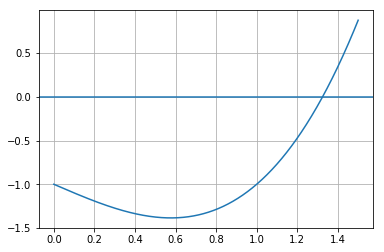

In [78]:
plt.plot(xs,xs**3-xs-1)
plt.grid()

13) What is the slope of the tangent line at $x=2$

$$f'(x) = 3x^2-1+0\\
m = 12-1 = 11\\
c = f(x_n)-f'(x_n)x_n\\
\text{tangent} = 11x - 17$$

48.59250966822715


13) What is the equation for the tangent line at $x=2$

14) What is the x-intercept of that line?

$$0 = 11x-17\\
\frac{17}{11} = x$$

15) What is the next guess?

$$x_{n+1} = 2-\frac{5}{11}$$

16) Now plot the equation along with the vertical line from (x,0) to (x,f(x)) and the tangent line from x to the new intercept. If you don't understand see makethis.pdf. I want the first triangle.

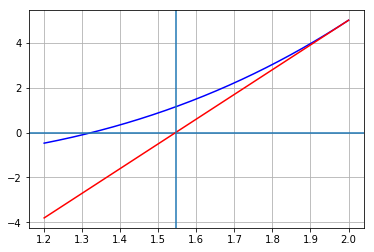

In [85]:
plt.plot(xs,xs**3-xs-1,color = "blue")
plt.axhline(0)
plt.plot(xs,11*xs-17, color = "red")
plt.axvline(17.0/11)
plt.grid()

17) Now find out the general formula for next guess given that the current guess is (x_n).

$$x_n = x_n - \frac{x^3_n-x_n-1}{x^2_n-1}$$

18) Iterate Newton's method 4 time and what is your guess for the solution. Verify your answer graphically

In [96]:
#print("x2 = "(2-((2**3-2-1)/2**2-1))
def n_term(x):
      return x-(x**3-x-1)/(3*x**2-1)
start = 2
for i in range(4):
      start = (n_term(start))
      print(start)

1.5454545454545454
1.359614915915184
1.325801345005845
1.3247190494171253


19) Make a plot that looks like makethis.pdf.

This is how I made the label. (Read the doc)

`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

# If you are bored

1) Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

2) Use bisection method to find the location for the `maximum` (with error less than $10^{-6}$) of

$\begin{equation*}
f(x) = -2x^6 - 1.5x^4 + 10x + 2
\end{equation*}$

Also find the maximum value for this function


3) Find solution to $x = 2 \sin(\sqrt{x})$ Newton's method. Pick initial guess wisely. (Plot something)

3.1) Of course you are gonna ask me when to stop. Figure out a way to programatically(not plot and zoom) make sure that your answer is already at most $10^{-7}$ away from the real answer. (Hint: Use the trick you know from picking bound in bisection method)

4) Find the root for $e^{-0.5x}(4-x) = 2$ using Newton's method. Try intial guess of 2, 6 and 8. Explain what happen to each initial value?

5) Show that you can estimate $\sqrt a$ by just keep iterating
$\begin{equation}
        x_{n+1} = \frac{x_n + \frac{a}{x_n}}{2}
\end{equation}$
Hint: Newton's Method. This is how they did it before the day of calculator.

6) One of the disadvantage of Newtons method is having to find the first derivative analytically. 


This is actually not plausible in all cases.

Read up Secant method from the lecture note and find the solution for
$8 e^{-x} \sin x = 1$ using secant's method.

Pick appropriate initial value and use the technique you found in 3.1 and give an answer that is at most $10^{-6}$ away from real answer. 